In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Base Mapping Jalur Kereta Jakarta-Jawa Barat

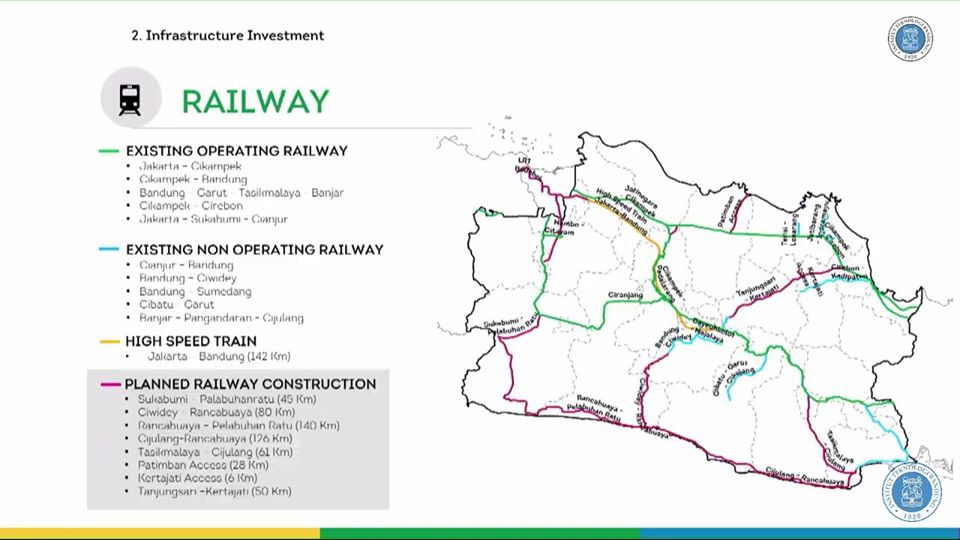

# Mapping Tiap Rute

In [2]:
# mapping tiap rute kota

df = pd.DataFrame({
    'from': [
        'Jakarta', 'Cikampek', 'Bandung', 'Garut', 'Tasikmalaya', 'Banjar',
        'Cikampek', 'Sukabumi', 'Bandung', 'Bandung', 'Cibatu', 'Banjar',
        'Pangandaran', 'Jakarta', 'Sukabumi', 'Ciwidey', 'Rancabuaya', 'Cijulang', 'Tasikmalaya', 'Tanjungsari'
    ],
    'to': [
        'Cikampek', 'Bandung', 'Garut', 'Tasikmalaya', 'Banjar', 
        'Cirebon', 'Cianjur', 'Bandung', 'Ciwidey', 'Garut', 'Sumedang', 
        'Pangandaran', 'Cijulang', 'Bandung', 'Palabuhanratu', 'Rancabuaya', 'Pelabuhan Ratu',
        'Rancabuaya', 'Cijulang', 'Kertajati'
    ]
})

G = nx.from_pandas_edgelist(df, 'from', 'to')

# Menampilkan dan Memberi Warna Graph

In [3]:
# membuat fungsi untuk menampilkan graph

def draw_graph(data=None, sizes='Black', colormap='None'):
  if data != None:
    cent = np.fromiter(data.values(), float)
    sizes = cent / np.max(cent) * 200

    normalisasi = mcolors.Normalize(vmin=cent.min(), vmax=cent.max()) 
    colormap = cm.Set1_r

    scalarmappaple = cm.ScalarMappable(norm=normalisasi, cmap=colormap)
    scalarmappaple.set_array(cent)

  plt.figure(figsize=(15, 10))
  nx.draw_kamada_kawai(G, with_labels=True, node_size=8000, font_color="white", font_weight='500', node_color=sizes, cmap=colormap)
  plt.show()

# Hasil Mapping

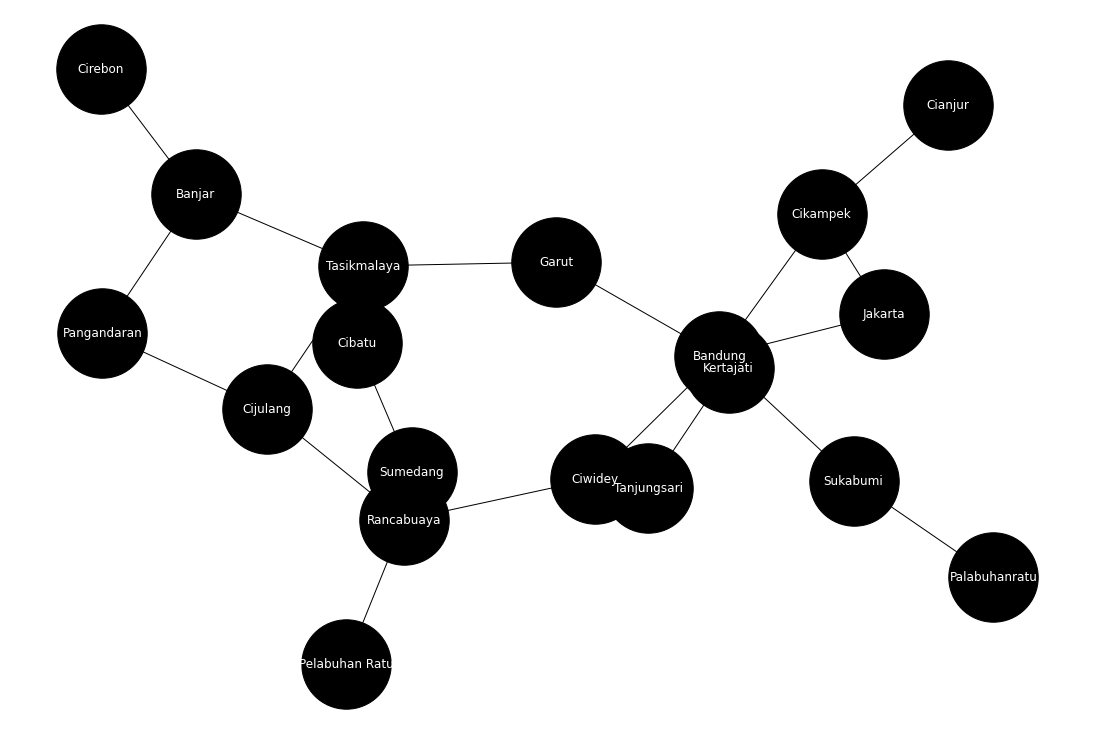

In [4]:
draw_graph()

# Betweeness Centrality

In [5]:
# betweeness centrality

between = nx.betweenness_centrality(G)

df = pd.DataFrame(sorted(between.items(), key=lambda p: p[1], reverse=True), columns=['Kota', 'Nilai Betweeness'])
df

,Kota,Nilai Betweeness
0,Bandung,0.354031
1,Tasikmalaya,0.185185
2,Garut,0.171024
3,Rancabuaya,0.142702
4,Ciwidey,0.117647
5,Cijulang,0.110022
6,Banjar,0.104575
7,Cikampek,0.084967
8,Sukabumi,0.084967
9,Pangandaran,0.023965


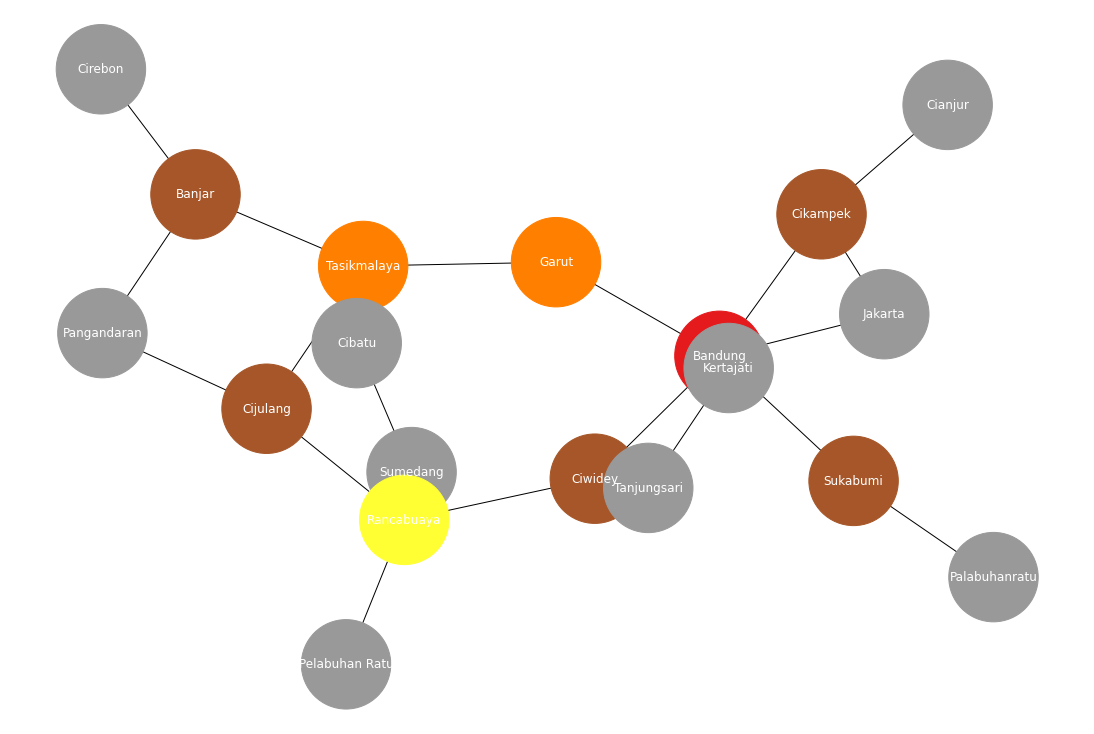

In [6]:
draw_graph(between)

# Degree Centrality

In [7]:
#degree centrality

degree = nx.degree_centrality(G)

df = pd.DataFrame(sorted(degree.items(), key=lambda p: p[1], reverse=True), columns=['Kota', 'Nilai Degree'])
df

,Kota,Nilai Degree
0,Bandung,0.277778
1,Cikampek,0.166667
2,Tasikmalaya,0.166667
3,Banjar,0.166667
4,Cijulang,0.166667
5,Rancabuaya,0.166667
6,Jakarta,0.111111
7,Garut,0.111111
8,Sukabumi,0.111111
9,Ciwidey,0.111111


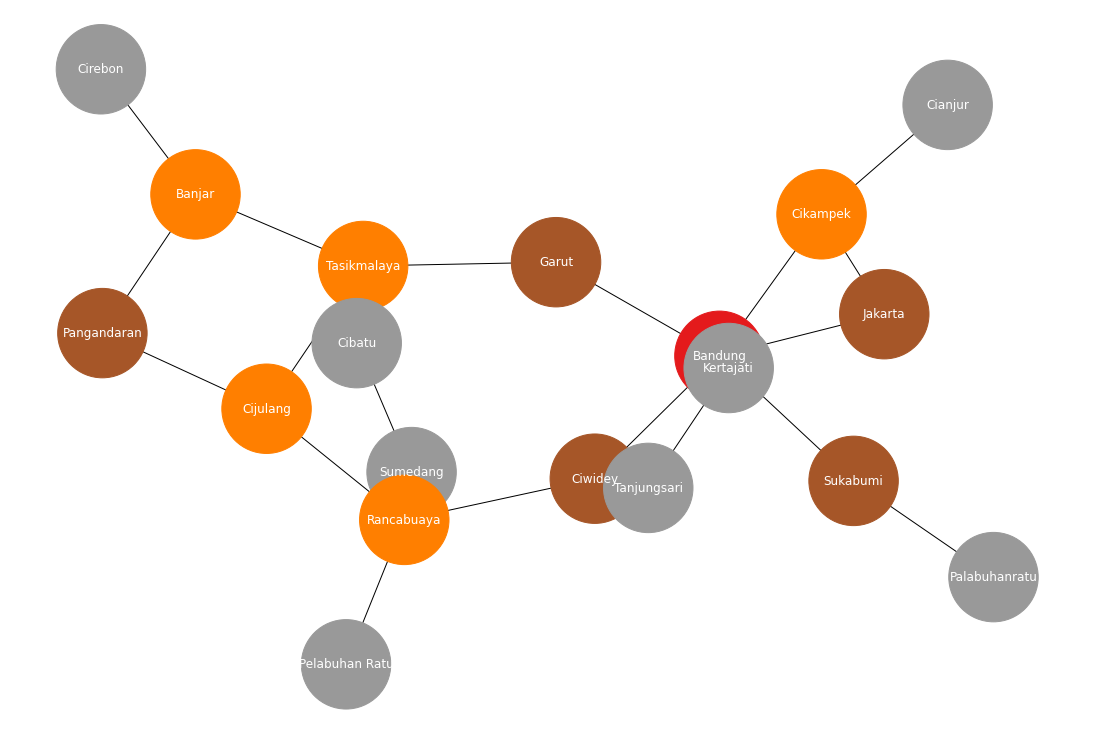

In [8]:
draw_graph(degree)

# Kesimpulan

Berdasarkan Betweeness Centrality dan nilai Degree Centrality, kota terpenting adalah kota Bandung, dengan nilai betweeness sebesar 0.354031 dan nilai degree sebesar 0.277778